# Brusselator System
***
https://en.wikipedia.org/wiki/Brusselator
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../..')))

In [2]:
import gillespy2

***
## Build the Brusselator System
***

In [3]:
def build_brusselator(parameter_values=None):
    # Initialize Model
    model = gillespy2.Model(name="Brusselator")
    
    # Set System Volume
    model.volume = 1000

    # Define Variables (GillesPy2.Species)
    # (C and D are inert products)
    A = gillespy2.Species(name="A", initial_value=100000)
    B = gillespy2.Species(name="B", initial_value=100000)
    C = gillespy2.Species(name="C", initial_value=0)
    D = gillespy2.Species(name="D", initial_value=0)
    X = gillespy2.Species(name="X", initial_value=2000)
    Y = gillespy2.Species(name="Y", initial_value=1000)
    
    # Add Variables to Model
    model.add_species([A, B, C, D, X, Y])

    # Define Parameters (rates)
    rate1 = gillespy2.Parameter(name="rate1", expression=5000.0)
    rate2 = gillespy2.Parameter(name="rate2", expression=50.0)
    rate3 = gillespy2.Parameter(name="rate3", expression=0.00005)
    rate4 = gillespy2.Parameter(name="rate4", expression=5.0)
    
    # Add Parameters to Model
    model.add_parameter([rate1, rate2, rate3, rate4])

    # Define Reactions
    reaction1 = gillespy2.Reaction(
        name="reaction1", reactants={'A': 1}, products={'X': 1, 'A': 1}, propensity_function="rate1"
    )
    reaction2 = gillespy2.Reaction(
        name="reaction2", reactants={'B': 1, 'X': 1},
        products={'Y': 1, 'C': 1, 'B': 1}, propensity_function="rate2 * X"
    )
    reaction3 = gillespy2.Reaction(
        name="reaction3", reactants={'X': 2, 'Y': 1}, products={'X': 3},
        propensity_function="rate3 * Y * X * (X - 1) / 2"
    )
    reaction4 = gillespy2.Reaction(
        name="reaction4", reactants={'X': 1}, products={'D': 1}, propensity_function="rate4 * X"
    )
    
    # Add Reactions to Model
    model.add_reaction([reaction1, reaction2, reaction3, reaction4])

    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=30, num_points=3000)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [4]:
model = build_brusselator()

***
## Run the Simulations
***

In [5]:
%time results = model.run()

CPU times: user 25.7 ms, sys: 91.5 ms, total: 117 ms
Wall time: 1.9 s


In [6]:
%time ode_results = model.run(algorithm="ODE")

CPU times: user 11.2 ms, sys: 8.83 ms, total: 20.1 ms
Wall time: 3.23 s


***
## Visualizations
***

In [7]:
species_to_plot = ["X", "Y"]

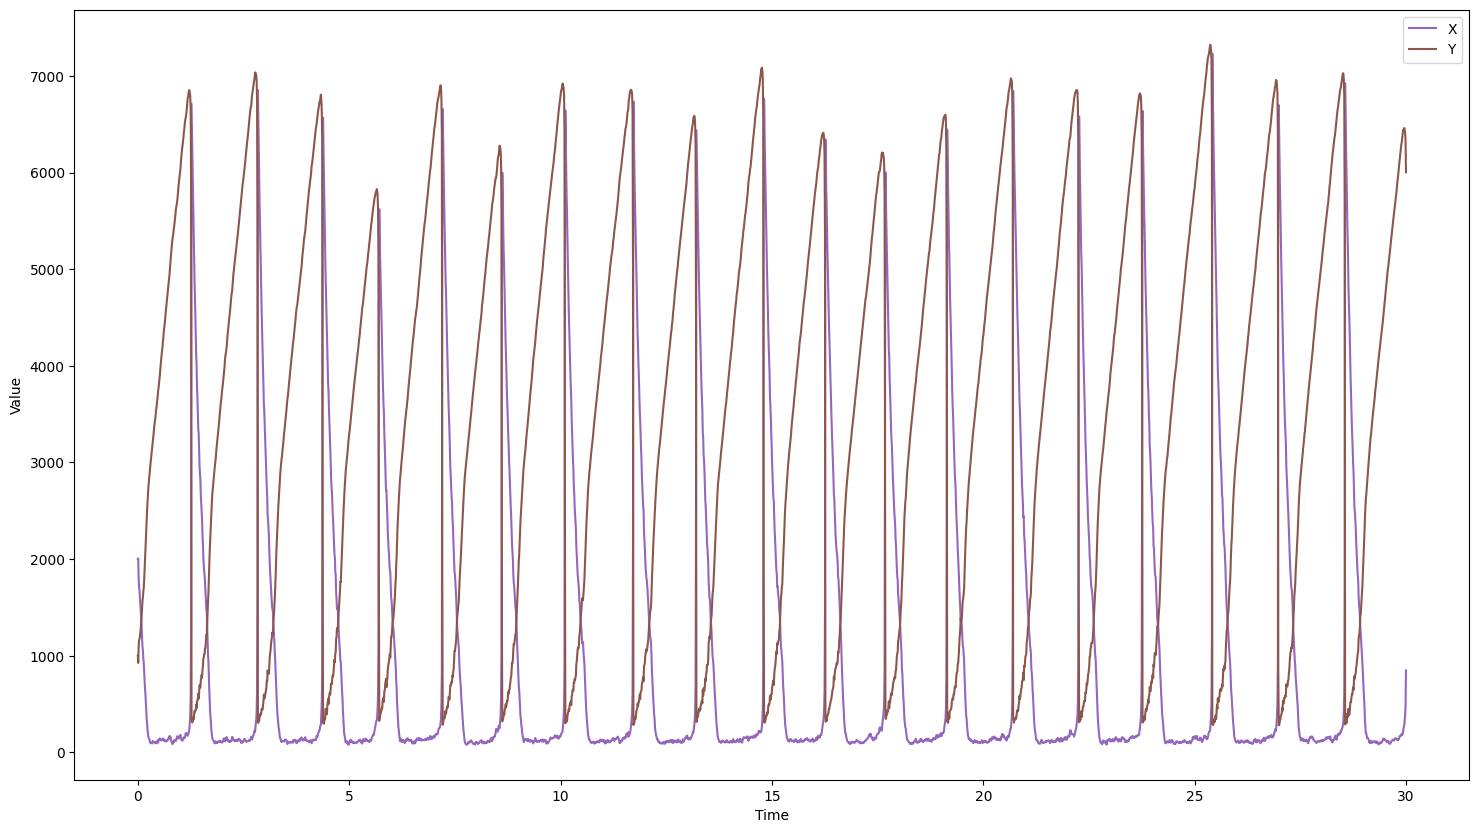

In [8]:
results.plot(included_species_list=species_to_plot)

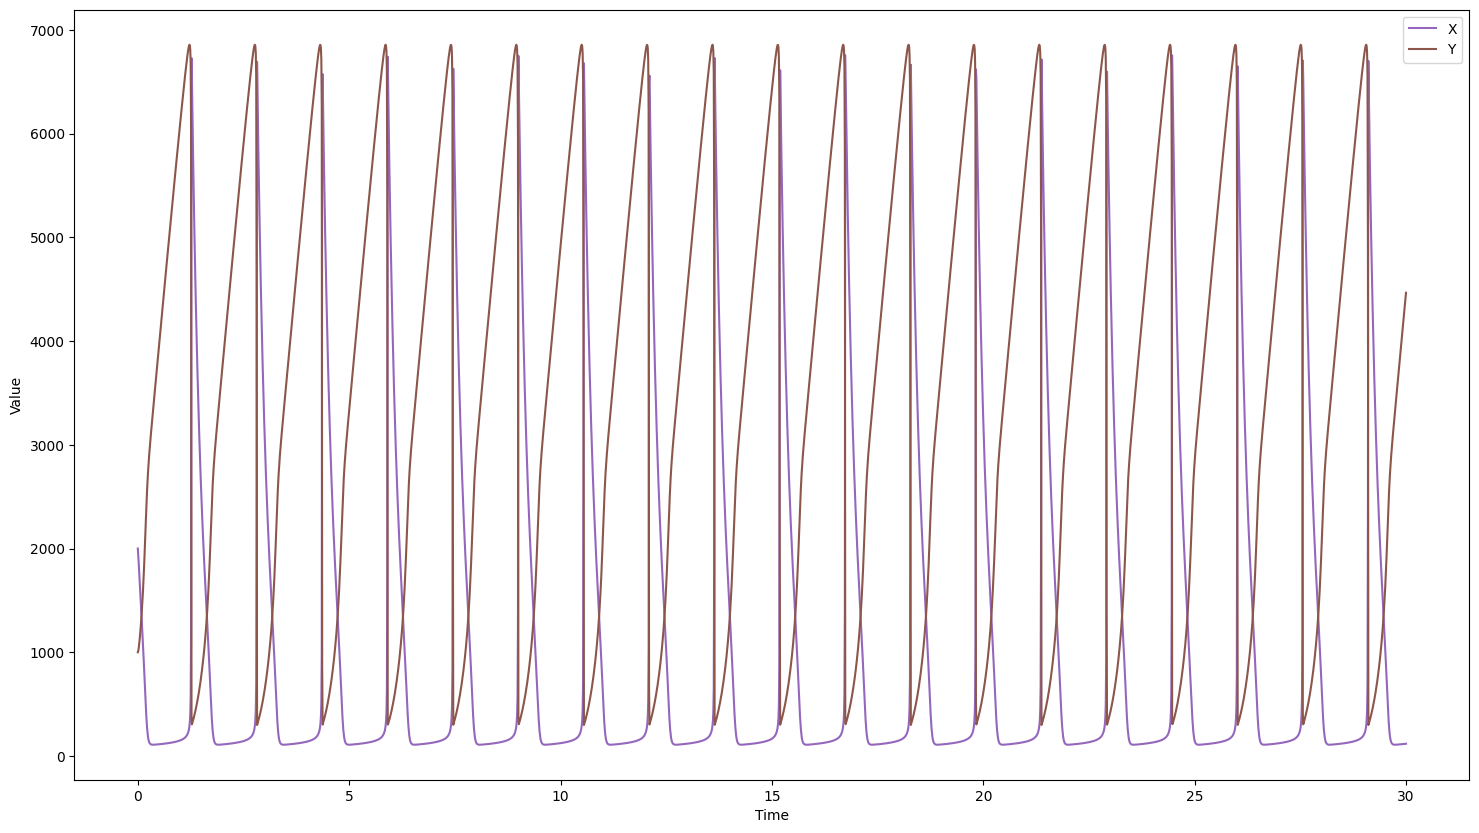

In [9]:
ode_results.plot(included_species_list=species_to_plot)